In [1]:
using AutoRisk
using AutoViz
using Interact
using CommandLineFlags
using NGSIM
using Reel
Reel.set_output_type("gif");
include("../collection/collect_heuristic_dataset.jl");

In [2]:
# extract config from dataset
dataset_filepath = "../../data/datasets/may/ngsim_1_sec_traj_1.h5"
flags = h5readattr(dataset_filepath, "risk")
fixup_types!(flags)
framecollect = flags["framecollect"]
batch_idxs = h5read(dataset_filepath, "risk/batch_idxs");

# select NGSIM traj
traj_id = 1
traj = load_trajdata(traj_id)
roadway = get_corresponding_roadway(traj_id)
"loaded"

"loaded"

In [5]:
function Base.show(traj::ListRecord, roadway::Roadway, initial_frame_idx::Int)
    # prepare film for save case
    frames = Frames(MIME("image/png"), fps=10)
    
    # load the initial frame and framecollect frames into rec
    rec = SceneRecord(500, .1, 500)
    scene = Scene(500)
    for frame in initial_frame_idx:initial_frame_idx + framecollect
        AutomotiveDrivingModels.update!(rec, get!(scene, traj, frame))
    end
    initial_scene = get!(Scene(500), traj, initial_frame_idx)
    n_veh = initial_scene.n
    
    # display the record
    @manipulate for veh_idx in collect(1:n_veh),
                zoom in collect(1.:4.:20.),
                i in 1:rec.nframes,
                save in [false, true],
                clear in [false, true]
        i -= 1
        veh_id = initial_scene[veh_idx].id
        
        # set camera
        cam = AutoViz.CarFollowCamera{Int}(veh_id, zoom)

        # render scene
        idx = -(rec.nframes - i) + 1
        carcolors = Dict{Int,Colorant}()
        for veh in rec[idx]
            carcolors[veh.id] = veh.id == veh_id ? colorant"red" : colorant"green"
        end

        stats = [
            CarFollowingStatsOverlay(veh_id, 2), 
            NeighborsOverlay(veh_id, textparams = TextParams(x = 600, y_start=300))
        ]
       
        frame = render(rec[idx], roadway, stats, cam = cam, car_colors = carcolors)
        push!(frames, frame)
        
        # to use the save, move around the slider above and collect some frames to write
        # then switch to save, then switch off save
        # this will write the frames, and then clear them
        if save
            filename = "seed_$(seed)_veh_id_$(follow_veh_idx)_target_$(target_idx)"
            write("../../data/visualizations/outputs/$(filename).gif", frames)
            frames = Frames(MIME("image/png"), fps=2)
        end
        
        # to clear frames without saving them set this to true then false
        if clear
            frames = Frames(MIME("image/png"), fps=10)
        end
        
        frame
    end

end

Interact.Options{:ToggleButtons,Int64}(input-51: Signal{Int64}(1, nactions=1),"veh_idx",1,"1",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",124=>"124",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(input-52: Signal{Float64}(1.0, nactions=1),"zoom",1.0,"1.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"5.0"=>5.0,"9.0"=>9.0,"13.0"=>13.0,"17.0"=>17.0),Dict(9.0=>"9.0",13.0=>"13.0",17.0=>"17.0",5.0=>"5.0",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(input-53: Signal{Int64}(6, nactions=1),"i",6,"6",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Bool}(input-54: Signal{Bool}(false, nactions=1),"save",false,"false",Interact.OptionDict(DataStructures.OrderedDict("false"=>false,"true"=>true),Dict(false=>"false",true=>"true")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Bool}(input-55: Signal{Bool}(false, nactions=1),"clear",false,"false",Interact.OptionDict(DataStructures.OrderedDict("false"=>false,"true"=>true),Dict(false=>"false",true=>"true")),Any[],Any[],true,"horizontal")

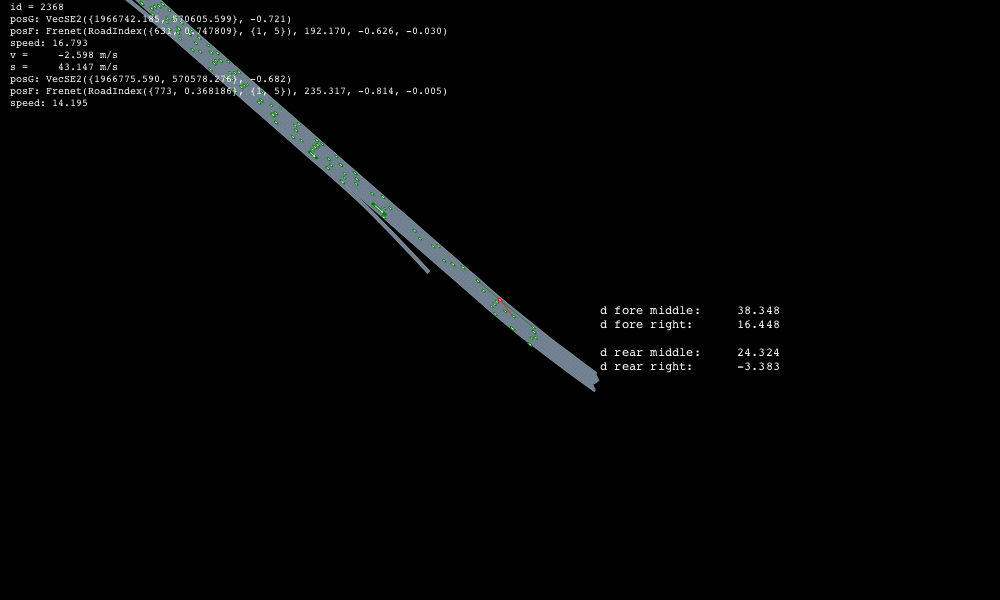

In [15]:
initial_frame_idx = 7350
show(traj, roadway, initial_frame_idx)

In [ ]:
println(typeof(traj))